# Análisis de a9a

In [102]:
import pandas as pd
from plotting import plot_comparatives
from utils import extract_parameters, sort_dataframe_by

database = 'a9a'

df_nystrom_and_svm = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_svm_classification_{database}_cv_5.csv')
df_nn = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/neural_network_classification_{database}_cv_5.txt')
df_nystrom_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_ridge_classification_{database}_cv_5.txt')
df_rbf_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/RBF_and_ridge_classification_{database}_cv_5.txt')
file_path_for_ksvm = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/KSVM_classification_a9a_cv_5.txt'


df_with_n_components = [df_nystrom_and_ridge, df_rbf_and_ridge, df_nystrom_and_svm]
df_labels = ['Nyström and ridge classification', 'RFF and ridge classification', 'Nystrom and svm classification']

damping_formula = lambda accuracy, time : accuracy / time *100
damping_column = 'damping'
for df in df_with_n_components:
    df['damping'] = damping_formula(df.accuracy_test,df.training_time)


In [103]:
# get KSVM data
best_params, training_time, test_accuracy = extract_parameters(file_path_for_ksvm)
damping = damping_formula(float(test_accuracy),float(training_time))
df_KSVM = pd.DataFrame({
    'model': ['KSVM'],
    'training_time': [training_time],
    'accuracy_test': [test_accuracy],
    'damping': [damping],  
    'best_params': [best_params]
})

df_KSVM

constant_values = {
    "training_time" : [training_time],
    'accuracy_test' : [test_accuracy ],
    'damping': [damping]
}
constant_labels = ['KSVM']

In [104]:
# Concatenate the data frames while adding the model information
df_results = pd.concat([
    df_nystrom_and_ridge.assign(model="nystrom_and_ridge of n_comp. "+df_nystrom_and_ridge["n_components"].astype(str)),
    df_rbf_and_ridge.assign(model="rbf_and_ridge of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_nystrom_and_svm.assign(model="nystrom_and_svm of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_KSVM
], ignore_index=True)



# Reorder the columns as per your requirement
df_results = df_results[["model", "training_time", "accuracy_test", "damping", "best_params"]]

# Print the unified data frame
df_results

,model,training_time,accuracy_test,damping,best_params
0,nystrom_and_ridge of n_comp. 10,0.214731,0.791045,368.389573,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
1,nystrom_and_ridge of n_comp. 20,0.194165,0.819483,422.055404,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
2,nystrom_and_ridge of n_comp. 50,0.336913,0.844051,250.525113,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
3,nystrom_and_ridge of n_comp. 100,0.488412,0.847000,173.419024,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
4,nystrom_and_ridge of n_comp. 200,0.733879,0.848412,115.606507,"{'nystroem__gamma': 0.0010162601626016261, 'ri..."
5,nystrom_and_ridge of n_comp. 500,1.563415,0.849518,54.337337,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
6,nystrom_and_ridge of n_comp. 1000,3.150516,0.849825,26.974151,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
7,rbf_and_ridge of n_comp. 10,0.166927,0.771881,462.405586,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
8,rbf_and_ridge of n_comp. 20,0.213646,0.781402,365.745672,"{'rbf_sampler__gamma': 0.0010162601626016261, ..."
9,rbf_and_ridge of n_comp. 50,0.257184,0.829003,322.338497,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."


In [105]:
ranking_size = 6

# Damping 


In [106]:
column_name = 'damping'
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  damping


,model,training_time,accuracy_test,damping,best_params
7,rbf_and_ridge of n_comp. 10,0.166927,0.771881,462.405586,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
1,nystrom_and_ridge of n_comp. 20,0.194165,0.819483,422.055404,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
0,nystrom_and_ridge of n_comp. 10,0.214731,0.791045,368.389573,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
8,rbf_and_ridge of n_comp. 20,0.213646,0.781402,365.745672,"{'rbf_sampler__gamma': 0.0010162601626016261, ..."
9,rbf_and_ridge of n_comp. 50,0.257184,0.829003,322.338497,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
10,rbf_and_ridge of n_comp. 100,0.323858,0.840980,259.675224,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."


## Accuracy on test

In [107]:
column_name = "accuracy_test"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  accuracy_test


,model,training_time,accuracy_test,damping,best_params
21,KSVM,59.805290,0.850992,1.422938,"{'svm__C': 316.22776601683796, 'svm__gamma': 8..."
20,nystrom_and_svm of n_comp. 1000,335.877148,0.850685,0.253273,"{'nystroem__gamma': 8.982555655316915e-05, 'sv..."
19,nystrom_and_svm of n_comp. 500,184.231867,0.850378,0.461580,"{'nystroem__gamma': 8.982555655316915e-05, 'sv..."
18,nystrom_and_svm of n_comp. 200,71.193979,0.850071,1.194020,"{'nystroem__gamma': 8.982555655316915e-05, 'sv..."
6,nystrom_and_ridge of n_comp. 1000,3.150516,0.849825,26.974151,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
5,nystrom_and_ridge of n_comp. 500,1.563415,0.849518,54.337337,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."


# Ranking by time

In [108]:
column_name = "training_time"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=True, ranking_size=ranking_size)

Sort by  training_time


,model,training_time,accuracy_test,damping,best_params
7,rbf_and_ridge of n_comp. 10,0.166927,0.771881,462.405586,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
1,nystrom_and_ridge of n_comp. 20,0.194165,0.819483,422.055404,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
8,rbf_and_ridge of n_comp. 20,0.213646,0.781402,365.745672,"{'rbf_sampler__gamma': 0.0010162601626016261, ..."
0,nystrom_and_ridge of n_comp. 10,0.214731,0.791045,368.389573,"{'nystroem__gamma': 8.982555655316915e-05, 'ri..."
9,rbf_and_ridge of n_comp. 50,0.257184,0.829003,322.338497,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."
10,rbf_and_ridge of n_comp. 100,0.323858,0.840980,259.675224,"{'rbf_sampler__gamma': 7.939532520325204e-06, ..."


# Plotting 


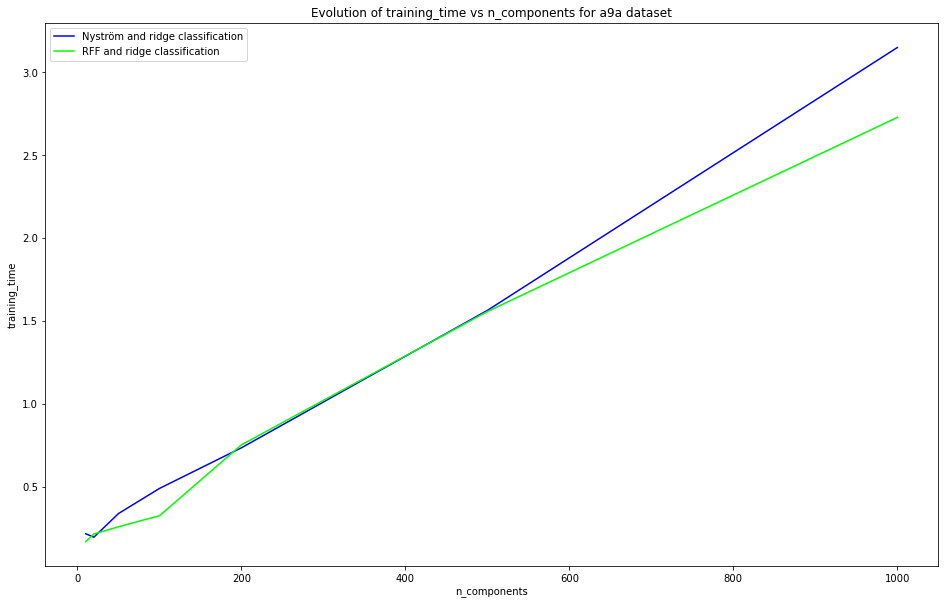

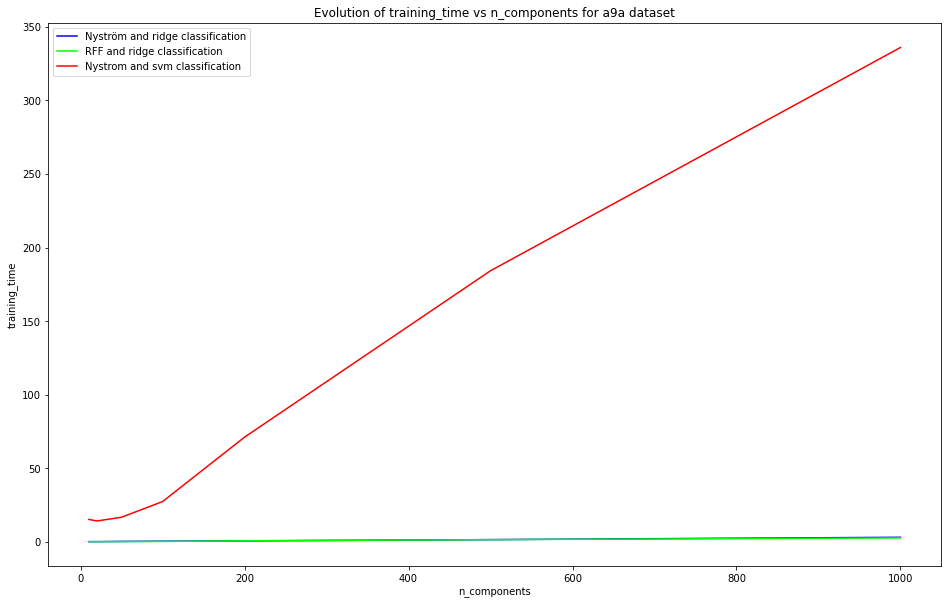

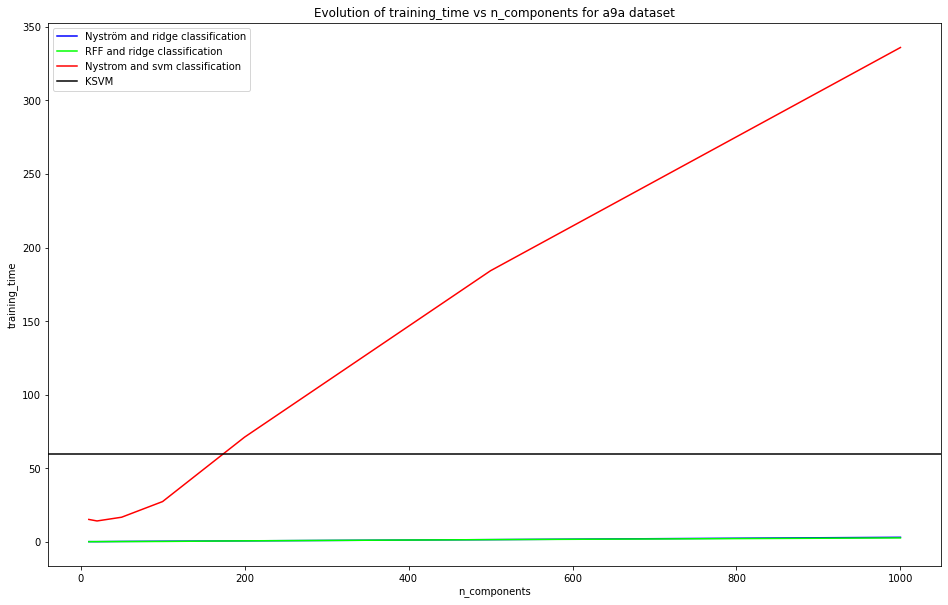

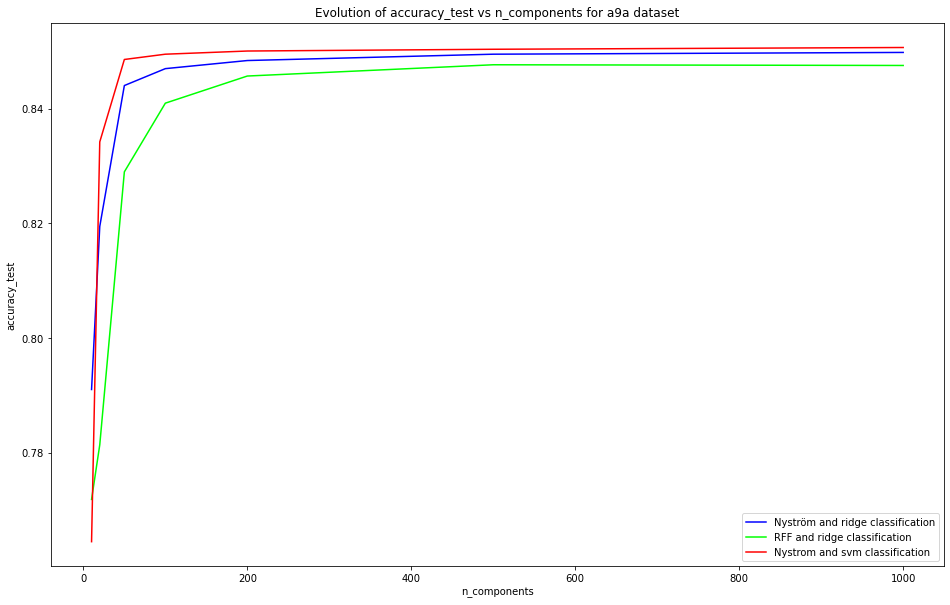

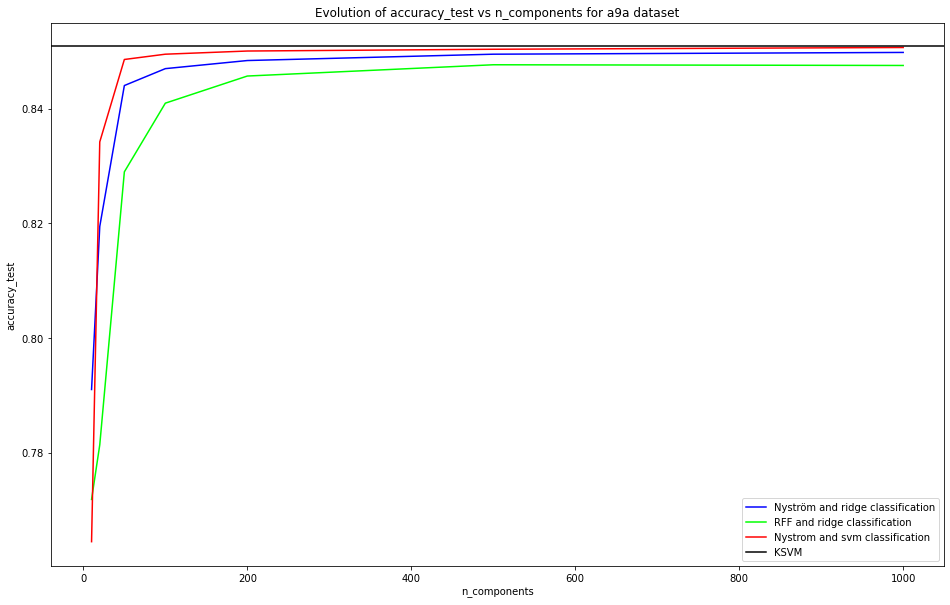

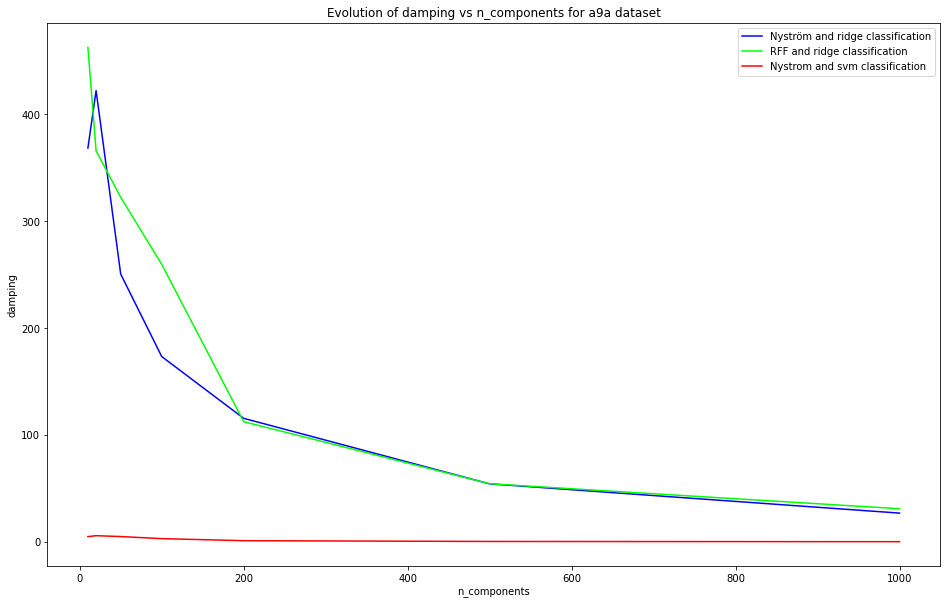

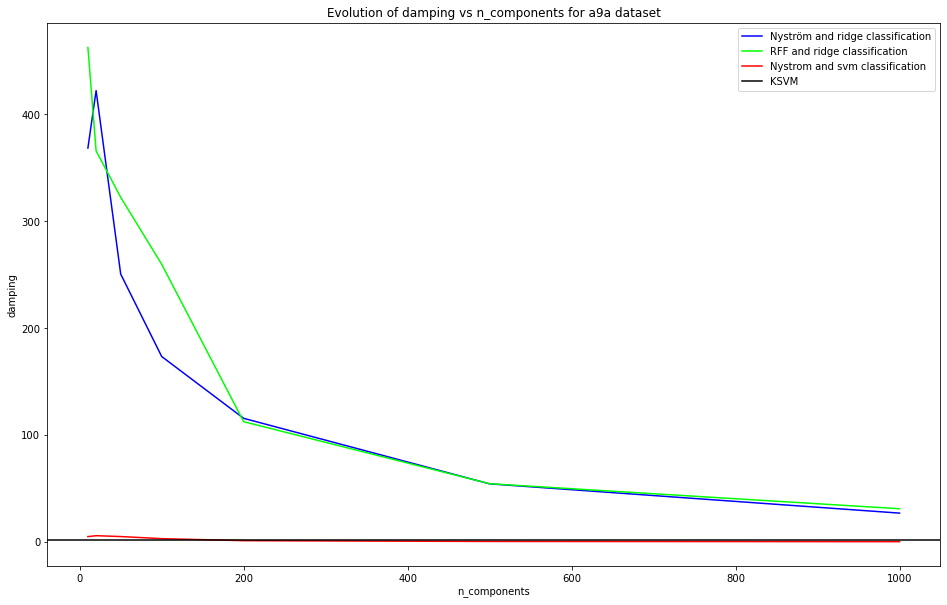

In [109]:

for column in ['training_time', 'accuracy_test', 'damping']:
    title = f'Evolution of {column} vs n_components for {database} dataset'
    if column == 'training_time':
        plot_comparatives(column=column, df_with_n_components=df_with_n_components[:-1], df_labels=df_labels[:-1], title=title)
    plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
    plot_comparatives(column, df_with_n_components, df_labels, title, constant_values[column], constant_labels , False)



In [110]:
nn_accuracy = df_nn.accuracy_test.to_list()
nn_training_time = df_nn.training_time.to_list()
nn_labels = list(map(lambda x: 'NN of shape '+str(x),df_nn.hidden_layer_sizes.to_list()))
df_nn.head()


nn_accuracy.append(test_accuracy)
nn_training_time.append(training_time)
nn_labels.append('KSVM')

In [111]:
nn_accuracy,nn_training_time,nn_labels

([0.8510533750998096,
  0.8465696210306493,
  0.8474295190713101,
  0.850991953811191],
 [978.511512041092, 35.615684509277344, 19.37067198753357, 59.80529022216797],
 ['NN of shape (20000,)',
  'NN of shape (141, 141)',
  'NN of shape (27, 27, 27)',
  'KSVM'])

In [112]:
from plotting import plot_comparatives

# Time analysis adults data set

Conclusion: Radom features win. 

Use Wilcolxon .

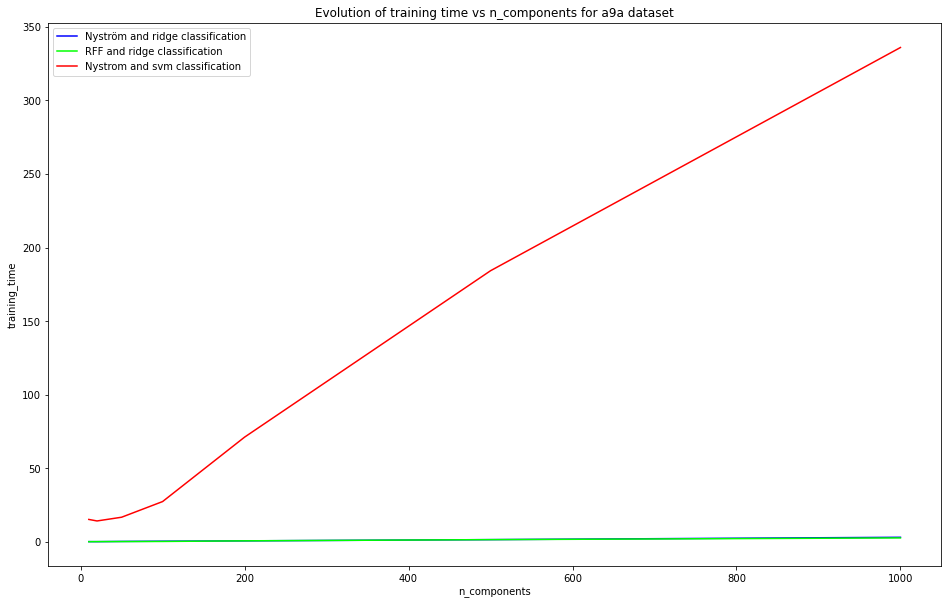

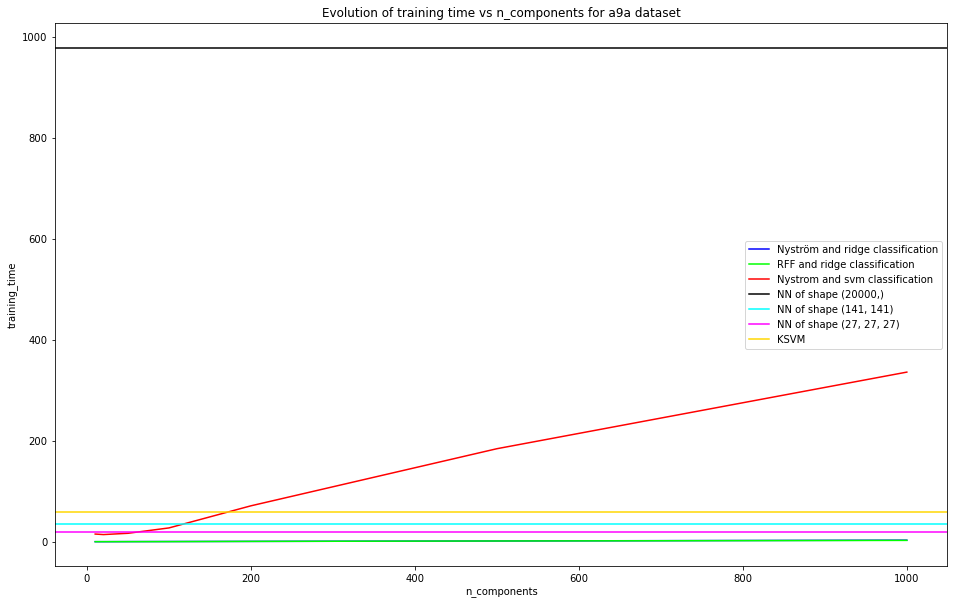

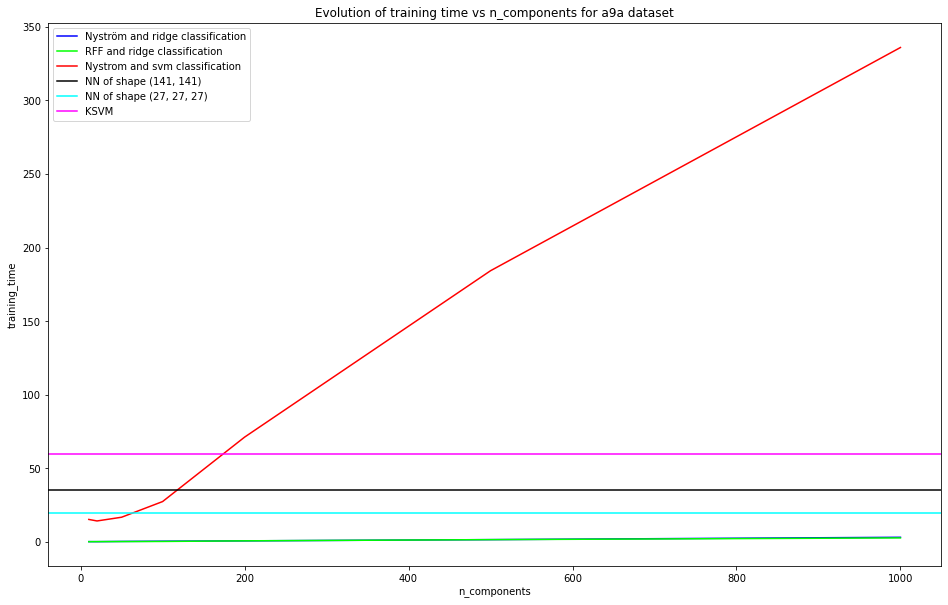

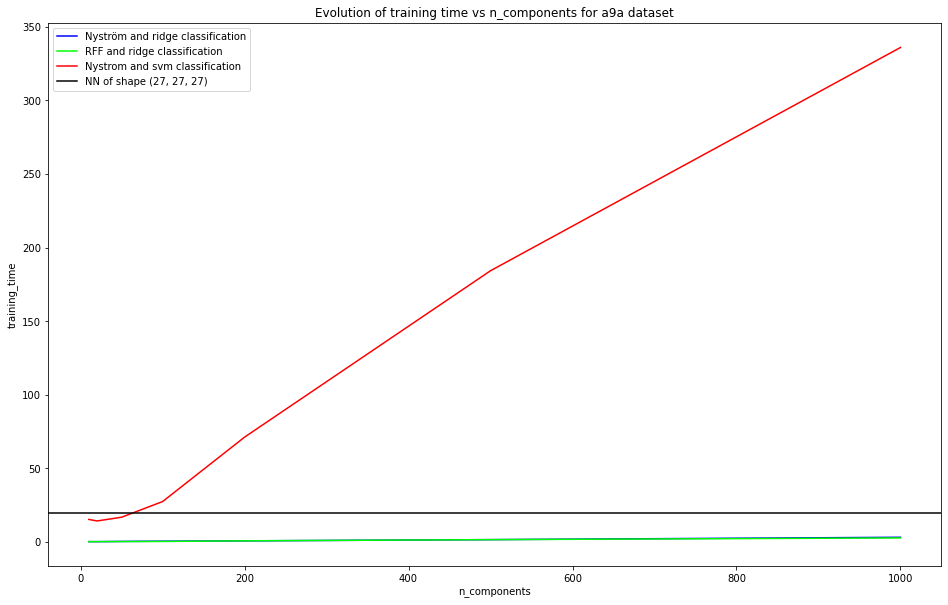

In [113]:

column = 'training_time'
title = f'Evolution of training time vs n_components for {database} dataset'

plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[2:-1], nn_labels[2:-1], False)

# TODO separate
# rm nn and add svc linear
# ksvm 
# rr Nystrom + rfb linear 
# usar intelet

# Accuracy 

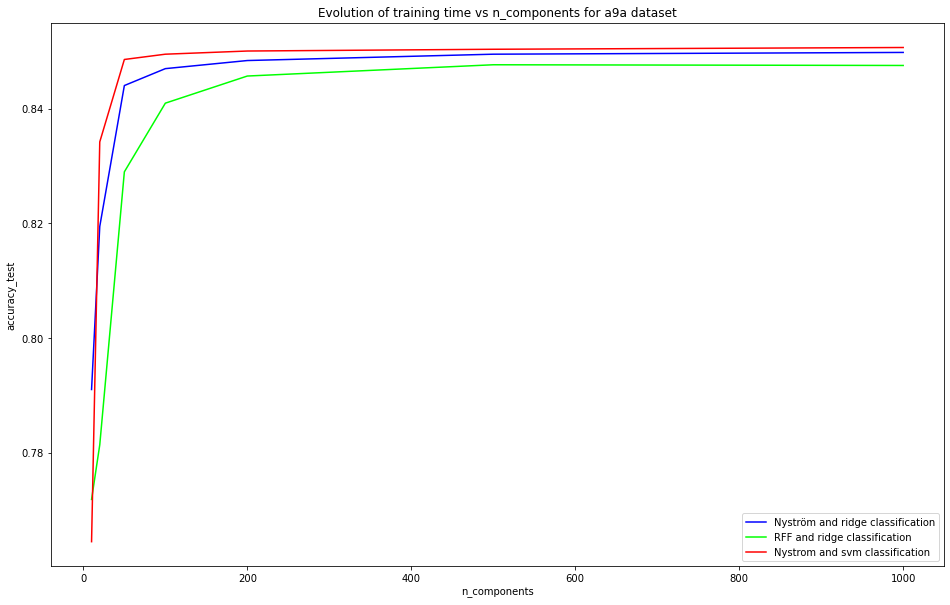

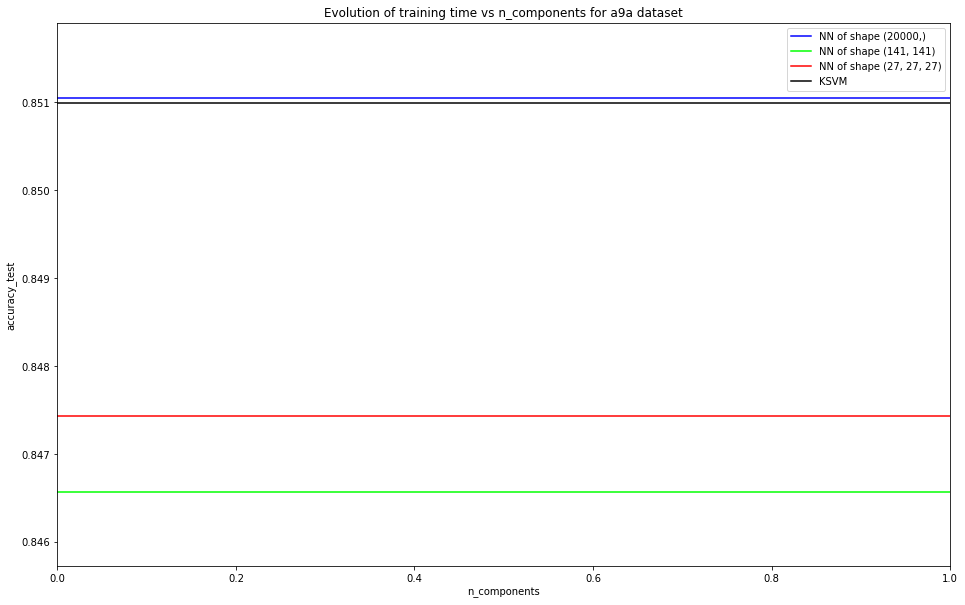

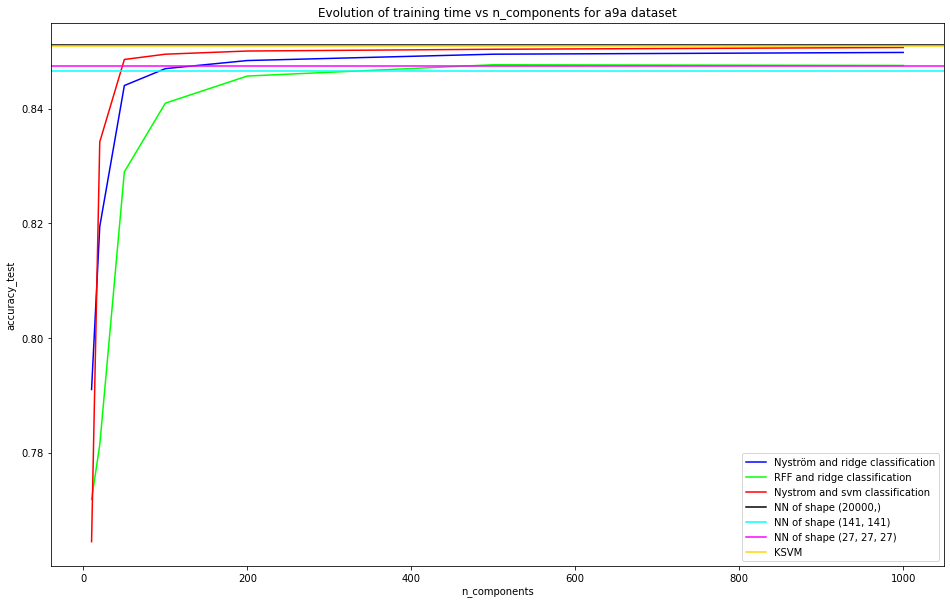

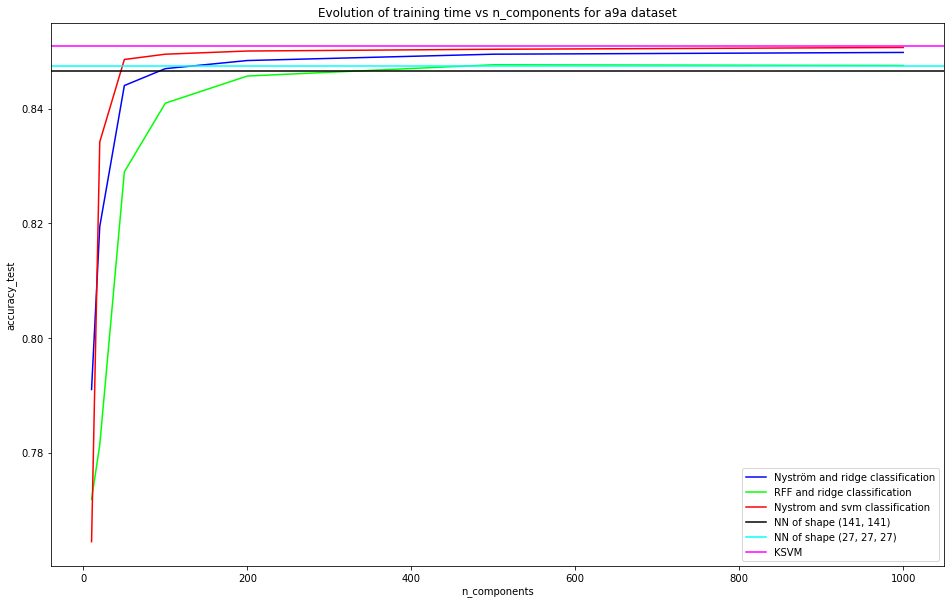

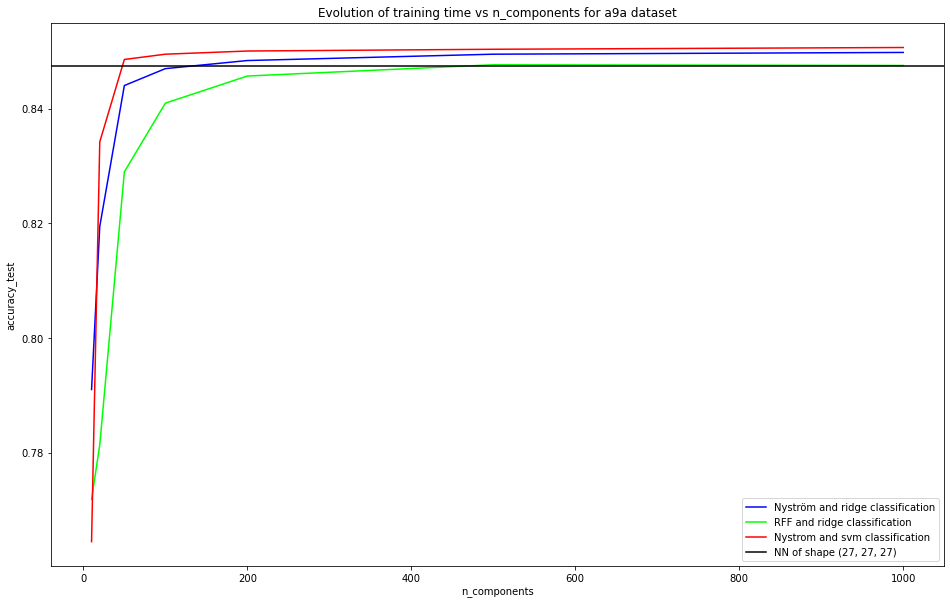

In [114]:
column = 'accuracy_test'

#df_labels = ['Nyström and ridge regression', 'RFF and ridge regression']
#title = 'Evolution of accuracy vs n_components for a9a dataset'
constant_data = nn_accuracy
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[2:-1], nn_labels[2:-1], False)


# Damping


Formula: 

$$damping = \frac{accuracy}{time} \times 100$$

The bigger the best

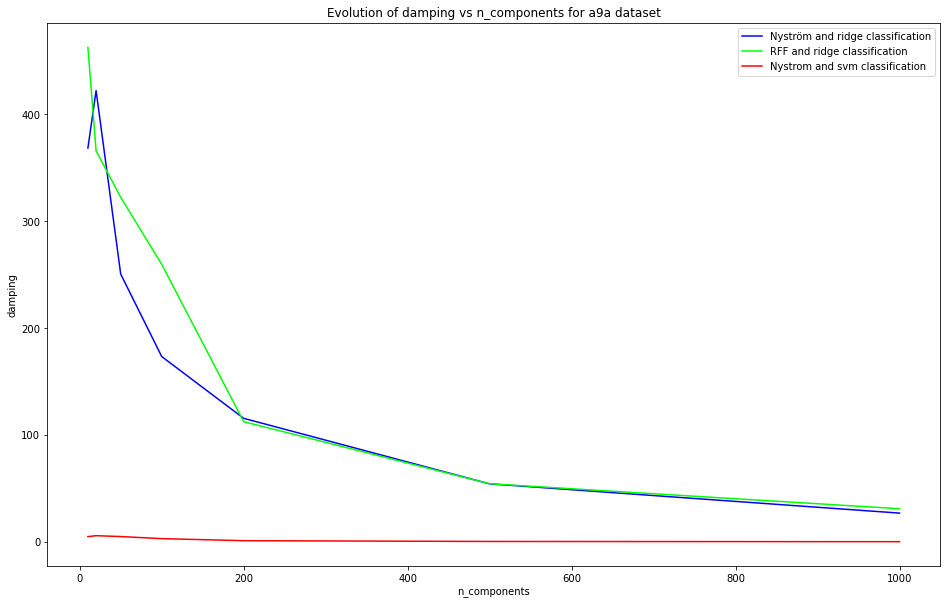

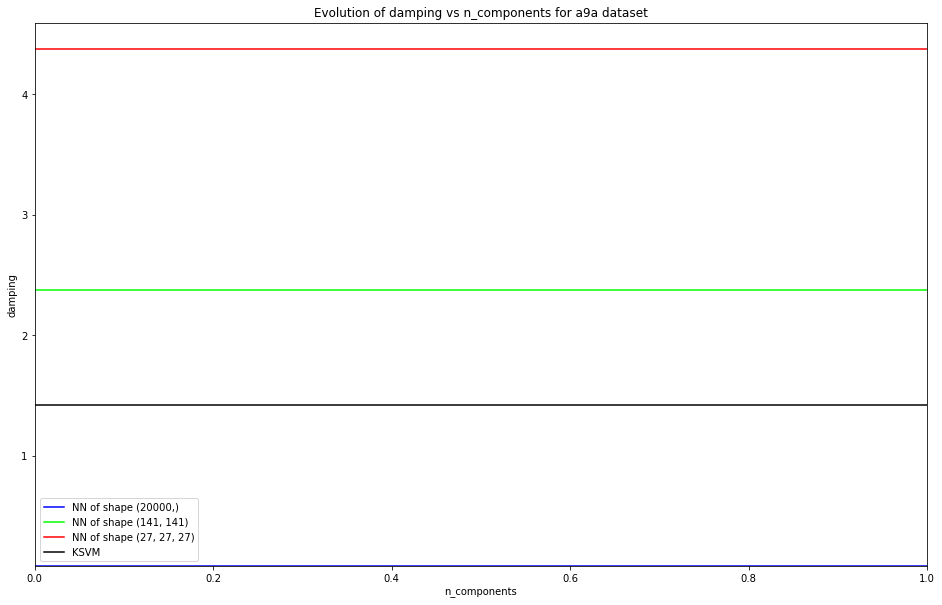

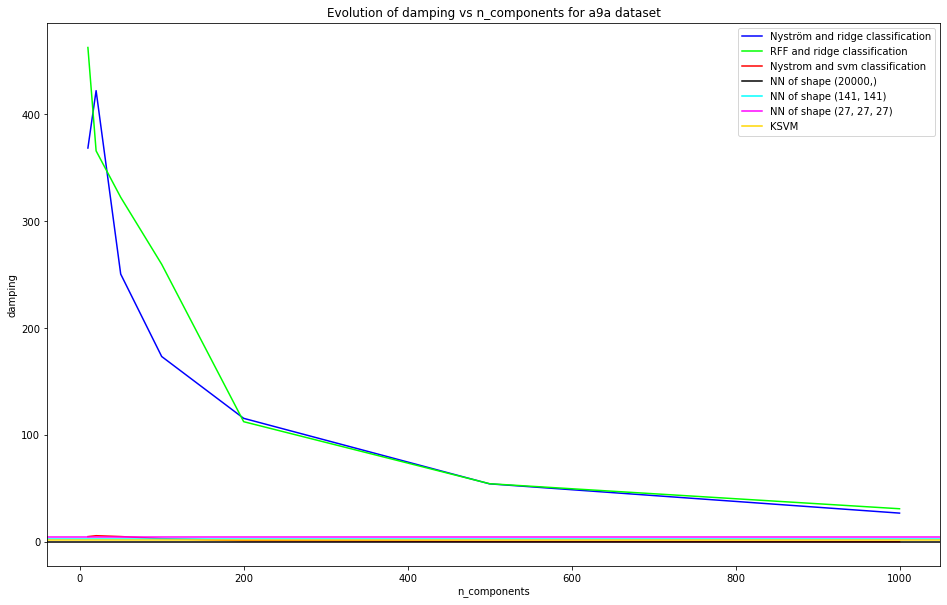

In [115]:
# Computing damping
constant_damping = [acc / time*100 for acc,time in zip(nn_accuracy, nn_training_time)]

# Plotting

column = damping_column
title = f'Evolution of damping vs n_components for {database} dataset'
constant_data = constant_damping
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False, constant_margin=0.05)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)